In [1]:
import sys
folder_prefix='/data/cgs'
sys.path.append(folder_prefix+'/sj1/bb_opt/scripts')

In [2]:
%load_ext autoreload
%autoreload 2

import torch
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [3]:
import collect_stats as cs

In [4]:
exp_folder = folder_prefix+'/sj1/bb_opt/experiments'
test_filepath = folder_prefix+'/sj1/bb_opt/data/tatsu_pbm/test_files'
filedir = folder_prefix+'/sj1/bb_opt/data/paper_data2'
num_tfs_to_test = 38
batches = [10, 20, 100, 200]
batches = [10]
num_acks = 30

In [5]:
with open(test_filepath, 'r') as f:
    filenames = [k.strip() for k in f.readlines()][:num_tfs_to_test]

In [6]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [7]:
filenames = [
    'HESX1_E149K_R1_8mers.txt',
    'EGR2_D383Y_R1_8mers.txt',
    'BCL6_H676Y_R1_8mers.txt',
    'ARX_L343Q_R1_8mers.txt',
    'CRX_E80A_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt',
    'FOXC1_F112S_R1_8mers.txt',
    'GFI1B_A204T_R1_8mers.txt',
    'GFI1_L400F_R1_8mers.txt',
    'HOXC4_N178S_R1_8mers.txt',
    'HOXD13_I322L_R1_8mers.txt',
    'ISX_R83Q_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'KLF1_E325K_R1_8mers.txt',
    'MSX2_P148H_R1_8mers.txt',
    'NKX2-5_K183E_R1_8mers.txt',
    'NR1H4_C144R_R1_8mers.txt',
    'NR2E3_G56R_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'PAX3_G48R_R1_8mers.txt',
    'PAX4_R183C_R1_8mers.txt',
    'PAX6_A79E_R1_8mers.txt',
    'PAX7_P112L_R1_8mers.txt',
    'PBX4_R215Q_R1_8mers.txt',
    'PHOX2B_Q143R_R1_8mers.txt',
    'PITX2_L100Q_R1_8mers.txt',
    'POU3F4_A237G_R1_8mers.txt',
    'POU4F3_K277R_R1_8mers.txt',
    'POU6F2_E639K_R1_8mers.txt',
    'PROP1_R112Q_R1_8mers.txt',
    'SIX6_H141N_R1_8mers.txt',
    'SNAI2_D119E_R1_8mers.txt',
    'VAX2_L139M_R1_8mers.txt',
    'VENTX_E101K_R1_8mers.txt',
    'VSX1_G160D_R1_8mers.txt',
    'WT1_F392L_R1_8mers.txt',
    'ZNF200_H322Y_R1_8mers.txt',
    'ZNF655_E327G_R1_8mers.txt',
]

In [8]:
tf_max = {}
tf_labels = {}
tf_rank = {}
for tf in filenames:
    labels = np.load(filedir + "/" + tf + "/labels.npy")
    labels = np.log(labels)
    tf_max[tf] = float(labels.max())
    tf_labels[tf] = labels
    labels_sorted_idx = np.argsort(labels)[::-1]
    label_rank = np.ones(labels_sorted_idx.shape[0])
    for i in range(len(labels_sorted_idx)):
        label_rank[labels_sorted_idx[i]] = i+1
    tf_rank[tf] = label_rank

In [9]:
arrs = {}

In [10]:
import collect_stats as cs

In [33]:
to_read = {
    #'dna_nips19/o_none_ucb_': [None, 'DeepEns'],
    #'dna_nips19/o_none_ucb_maxinvar_g000510204080_': [None, 'MOD-in'],
    'dna_nips19/o_none_ucb_maxvar_g000510204080_': [None, 'MOD'],
    #'dna_nips19/o_none_ucb_adve_': [None, 'DeepEns-AT'],
    #'dna1/o_none_ucb_nc_g000510204080_': [None, 'NegCorr'],
    #'dna_nips19/o_none_ucb_id_maxvar_g000510204080_': [None, 'MOD-R'],
}

In [54]:
arrs['dna_nips19/o_none_ucb_'][1] = 'DeepEns'
arrs['dna_nips19/o_none_ucb_maxinvar_g000510204080_'][1] = 'MOD-in'
arrs['dna_nips19/o_none_ucb_maxvar_g000510204080_'][1] = 'MOD'
arrs['ensemble14/o_none_ucb_adve_'][1] = 'DeepEns-AT'
arrs['ensemble14/o_none_ucb_nc_g000510204080_'][1] = 'NegCorr'
arrs['ensemble14/o_none_ucb_id_maxvar_g000510204080_'][1] = 'MOD-R'

In [36]:
for k in to_read:
    arrs[k] = to_read[k]
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=20, mode="bayes_opt")
    #cs.get_data(exp_folder, experiment, batches, num_samples=20, mode="bayes_opt")

reading dna_nips19/o_none_ucb_maxvar_g000510204080_
reading sample 1
reading sample 2
reading sample 3
reading sample 4
reading sample 5
reading sample 6
reading sample 7
reading sample 8
reading sample 9
reading sample 10
reading sample 11
reading sample 12
reading sample 13
reading sample 14
reading sample 15
reading sample 16
reading sample 17
reading sample 18
reading sample 19
reading sample 20


In [14]:
to_eval = [
    'dna_nips19/o_none_ucb_',
    'dna_nips19/o_none_ucb_maxinvar_g000510204080_',
    'dna_nips19/o_none_ucb_maxvar_g000510204080_',
    'dna_nips19/o_none_ucb_adve_',
    'dna1/o_none_ucb_nc_g000510204080_',
    'dna_nips19/o_none_ucb_id_maxvar_g000510204080_',
]

In [15]:
idx_data_extractor = lambda x, filename : x['idx_frac'][0].item()

In [16]:
ack_rel_opt_val_data_extractor = lambda x, filename : x['ack_rel_opt_value']

In [17]:
train_rmse_fn = lambda x, filename : x['logging'][1]['train']['std']

In [18]:
def ir_regret_fn(x, filename): 
    temp = x['ir_batch_cur_idx'].numpy().tolist()
    temp2 = set(x['ack_idx'].numpy().tolist())
    temp3 = None
    for k in temp[::-1]:
        if k not in temp2:
            break
    return np.exp(max(tf_labels[filename][k], tf_labels[filename][x['ack_idx']].max()))

def ack_regret_fn(x, filename):
    log_value = max(tf_labels[filename][x['ack_idx']].max(), tf_labels[filename][x['idx_at_each_iter'][0]].max())
    return -(np.exp(tf_max[filename])-np.exp(log_value))

def ack_rank_regret_fn(x, filename):
    return min(tf_rank[filename][x['ack_idx']].min(), tf_rank[filename][x['idx_at_each_iter'][0]].min())


In [36]:
import collect_stats as cs

In [42]:
cs.prop_test(10,
             filenames,
             ack_regret_fn,
             #ack_rel_opt_val_data_extractor,
             #ack_rank_regret_fn,
             arrs,
             [to_eval[2], to_eval[-2]],
             29,
             pval_threshold=1,
             paired_test=False,
             single_test=True,
            )

comparing MOD NegCorr
HESX1_E149K_R1_8mers.txt 0.3441152651084402 0.6558847348915597 -2527.098320124222 -3017.8902472075556 	 (std: 3575.85328 3698.10011, #n: 18 20)
EGR2_D383Y_R1_8mers.txt 0.45054600868549516 0.5494539913145049 -24199.11639376757 -25301.324238819652 	 (std: 28172.69020 22863.37609, #n: 18 18)
BCL6_H676Y_R1_8mers.txt 0.9586510468436428 0.04134895315635718 -103.64265024677115 -7.212177115434315e-05 	 (std: 231.75185 0.00000, #n: 18 20)
ARX_L343Q_R1_8mers.txt 0.8232021233535955 0.1767978766464045 -2612.721483810661 -2397.03381019955 	 (std: 652.86669 724.18048, #n: 18 20)
CRX_E80A_R1_8mers.txt 0.844928061272499 0.15507193872750102 -32986.70453587397 -26707.002278929518 	 (std: 20923.35294 14617.79340, #n: 18 20)
ESX1_K193R_R1_8mers.txt 0.10396813753534516 0.8960318624646548 -1401.6884073435758 -2610.0743448435765 	 (std: 1982.28547 3517.37257, #n: 18 20)
FOXC1_F112S_R1_8mers.txt 0.8656327654680941 0.1343672345319059 -100.30679305493443 -30.089865971601103 	 (std: 224.299

In [62]:
to_eval = [
    'ensemble14/o_none_ucb_',
    'ensemble14/o_none_ucb_maxinvar_g000510204080_',
    'ensemble14/o_none_ucb_maxvar_g000510204080_',
    'ensemble14/o_none_ucb_adve_',
    'ensemble14/o_none_ucb_nc_g000510204080_',
    #'ensemble14/o_none_ucb_mincov_g000510204080_',
]

In [46]:
import collect_stats as cs

In [109]:
filenames = [
    'HESX1_E149K_R1_8mers.txt',
    'EGR2_D383Y_R1_8mers.txt',
    'BCL6_H676Y_R1_8mers.txt',
    'ARX_L343Q_R1_8mers.txt',
    'CRX_E80A_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt',
    'FOXC1_F112S_R1_8mers.txt',
    'GFI1B_A204T_R1_8mers.txt',
    'GFI1_L400F_R1_8mers.txt',
    'HOXC4_N178S_R1_8mers.txt',
    'HOXD13_I322L_R1_8mers.txt',
    'ISX_R83Q_R1_8mers.txt',
    'KLF11_R402Q_R1_8mers.txt',
    'KLF1_E325K_R1_8mers.txt',
    'MSX2_P148H_R1_8mers.txt',
    'NKX2-5_K183E_R1_8mers.txt',
    'NR1H4_C144R_R1_8mers.txt',
    'NR2E3_G56R_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'PAX3_G48R_R1_8mers.txt',
    'PAX4_R183C_R1_8mers.txt',
    'PAX6_A79E_R1_8mers.txt',
    'PAX7_P112L_R1_8mers.txt',
    'PBX4_R215Q_R1_8mers.txt',
    'PHOX2B_Q143R_R1_8mers.txt',
    'PITX2_L100Q_R1_8mers.txt',
    'POU3F4_A237G_R1_8mers.txt',
    'POU4F3_K277R_R1_8mers.txt',
    'POU6F2_E639K_R1_8mers.txt',
    'PROP1_R112Q_R1_8mers.txt',
    'SIX6_H141N_R1_8mers.txt',
    'SNAI2_D119E_R1_8mers.txt',
    'VAX2_L139M_R1_8mers.txt',
    'VENTX_E101K_R1_8mers.txt',
    'VSX1_G160D_R1_8mers.txt',
    'WT1_F392L_R1_8mers.txt',
    'ZNF200_H322Y_R1_8mers.txt',
    'ZNF655_E327G_R1_8mers.txt',
]

In [101]:
filenames = [
    'HESX1_E149K_R1_8mers.txt',
    'OVOL2_D228E_R1_8mers.txt',
    'ESX1_K193R_R1_8mers.txt'
]

In [61]:
def ack_regret_fn(x, filename): 
    log_value = max(tf_labels[filename][x['ack_idx']].max(), tf_labels[filename][x['idx_at_each_iter'][0]].max())
    return np.exp(tf_max[filename])-np.exp(log_value)

In [59]:
to_eval = [
    'ensemble14/o_none_ucb_',
    'ensemble14/o_none_ucb_adve_',
    'ensemble14/o_none_ucb_nc_g000510204080_',
    'ensemble14/o_none_ucb_maxinvar_g000510204080_',
    'ensemble14/o_none_ucb_maxvar_g000510204080_',
    'ensemble14/o_none_ucb_id_maxvar_g000510204080_',
    #'ensemble14/o_none_ucb_mincov_g000510204080_',
]

/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/cluster/sj1/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


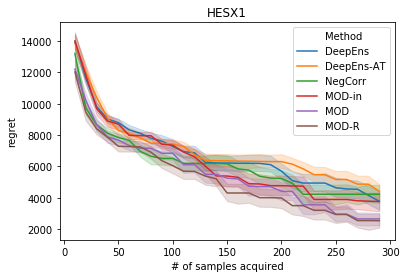

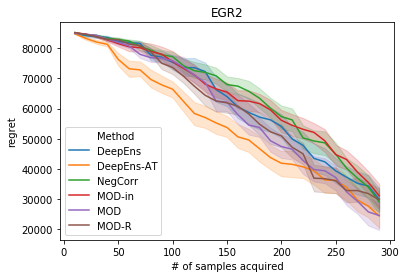

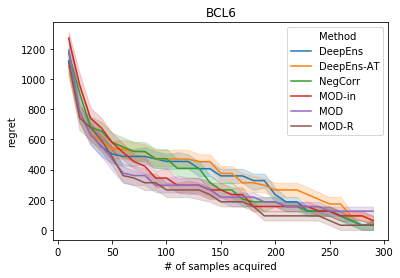

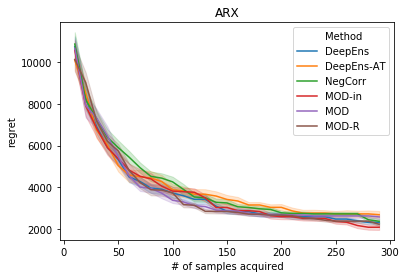

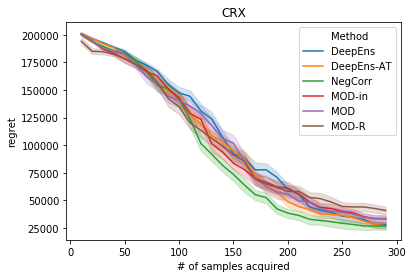

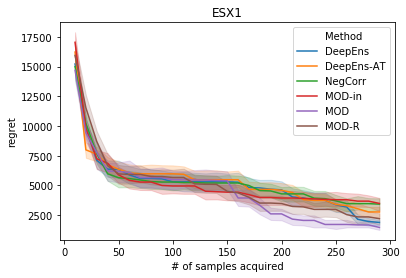

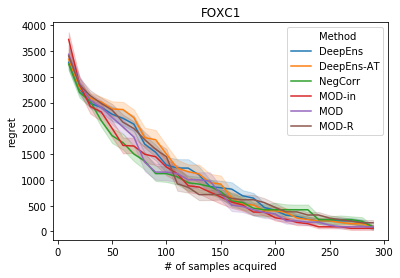

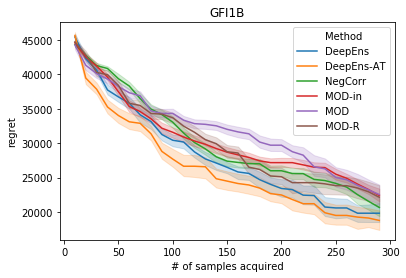

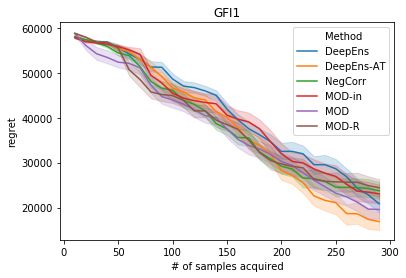

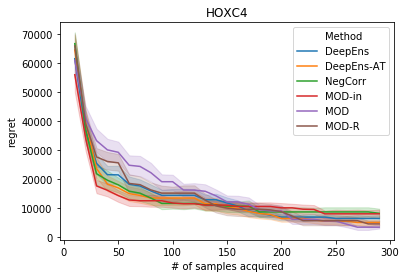

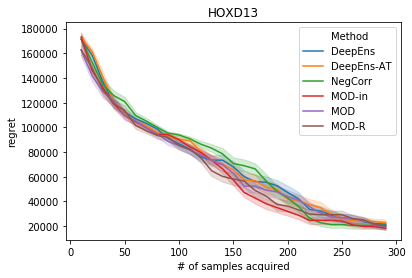

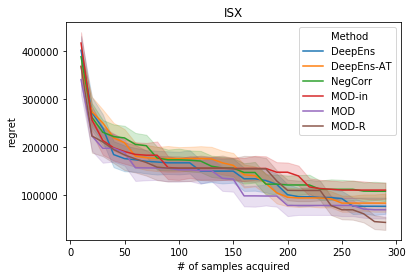

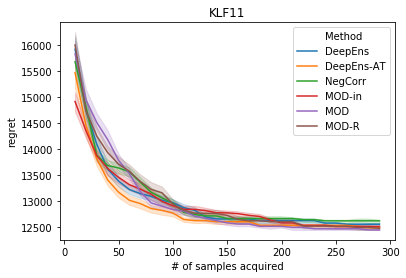

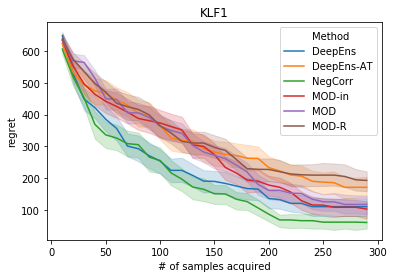

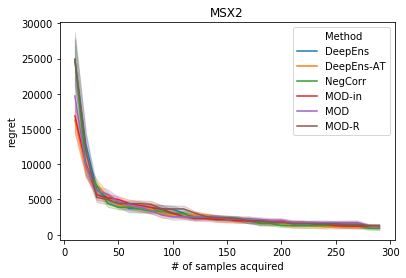

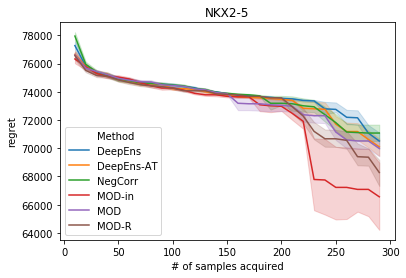

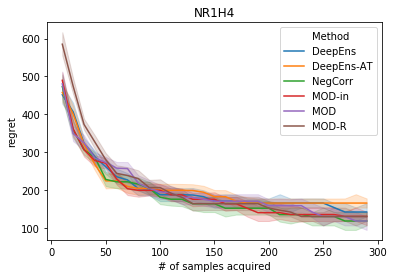

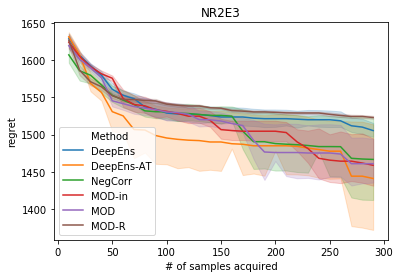

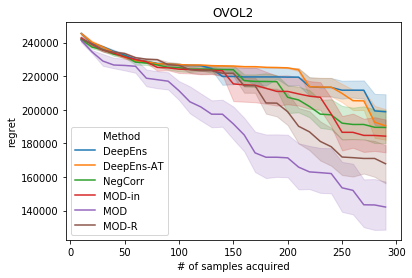

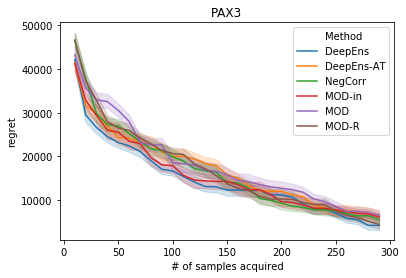

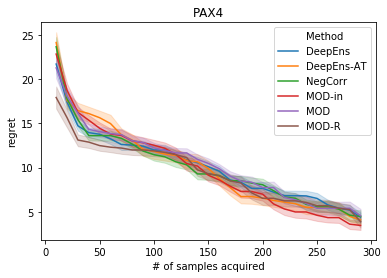

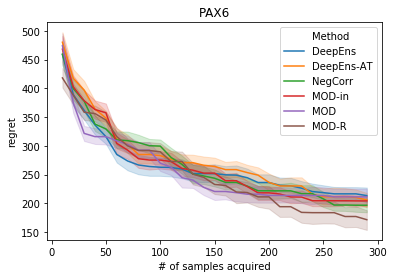

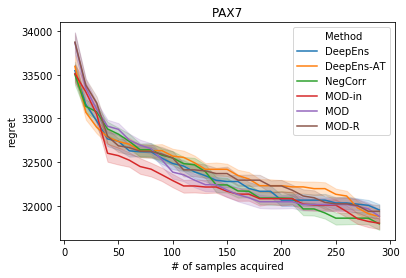

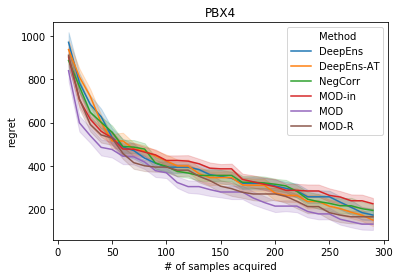

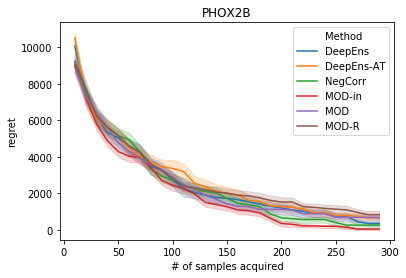

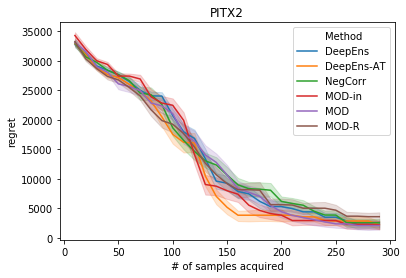

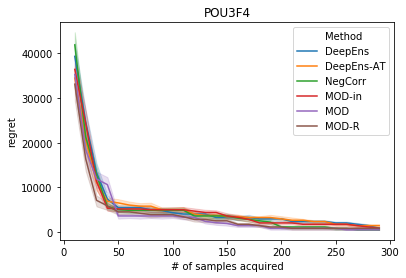

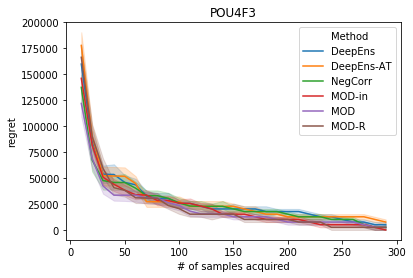

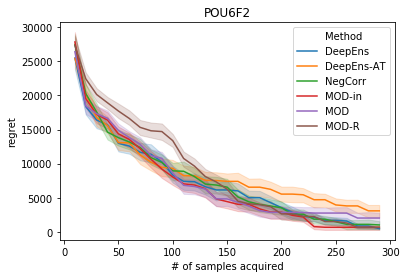

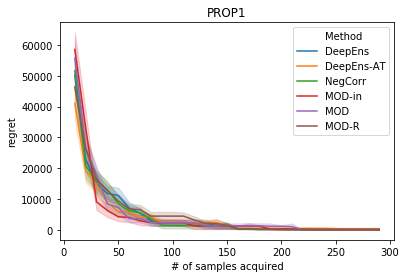

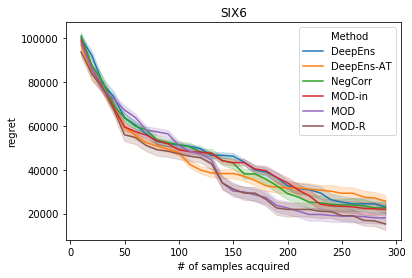

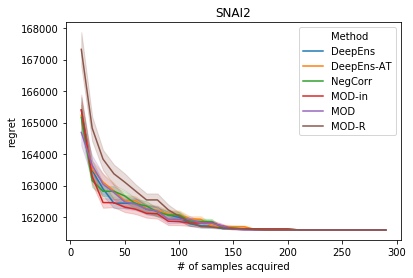

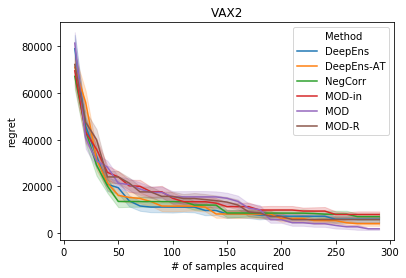

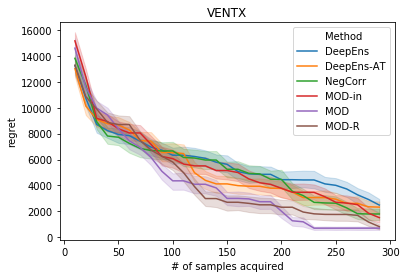

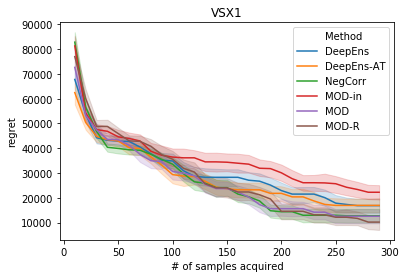

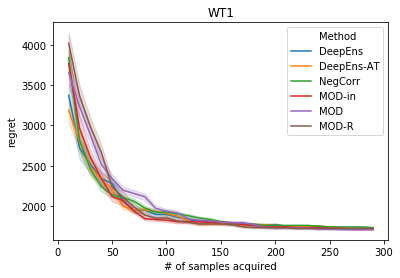

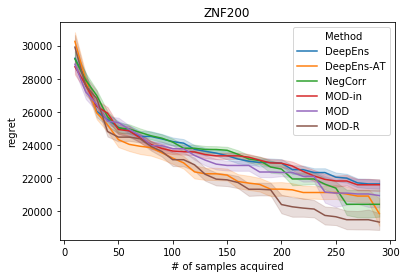

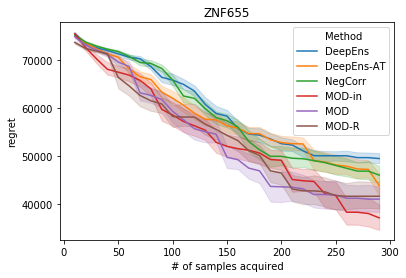

In [62]:
cs.plot_data_vs_ack_iter_with_ci(
    10,
    filenames,
    'regret',
    ack_regret_fn,
    #ack_rel_opt_val_data_extractor,
    30,
    arrs,
    to_eval,
    legend_loc=3,
    figsize=(6, 4),
    num_samples_label=True,
    save_path='/cluster/sj1/bb_opt/plots',
    ci=50,
)